# Pitcher Profile Model

### MSP 7.22.2017

The goal of this notebook is to develop a pitcher profile, then use the profile to build a model of outcomes for individual outings.

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [2]:
# imports for scraping

from bs4 import BeautifulSoup
import requests


In [3]:
# the listing of the teams of interest (all!)

teams = ['angels','astros','athletics','bluejays','braves',\
        'brewers','cardinals','cubs','diamondbacks','dodgers',\
        'giants','indians','mariners','marlins','mets','nationals',\
        'orioles','padres','phillies','pirates','rangers',\
        'rays','redsox','rockies','royals','tigers','twins',\
        'whitesox','yankees']



In [4]:
# construct the game logs for each team    

GameLog = {}


for inteam in teams:

        print inteam,

        GameLog[inteam] = {}

        r  = requests.get('http://www.fangraphs.com/teams/'+inteam+'/schedule')
        # can go back seasons with ?season=2016 at end of url

        data = r.text

        soup = BeautifulSoup(data)

        table_div = soup.find('div' , {"class":"team-schedule-table"})
        table = table_div.find('table')

        # The first tr contains the field names.
        headings = [th.get_text() for th in table.find("tr").find_all("th")]

        #print headings

        # get number of games played
        ngames = 0
        for row in table.find_all("tr")[1:]:
            if [td.get_text() for td in row.find_all("td")][5] != '':
                GameLog[inteam][ngames] = {}
                sav = [td.find('a') for td in row.find_all("td")][0]
                GameLog[inteam][ngames]['link'] = sav.get('href')[0:25]+'plays'+sav.get('href')[29:]
                GameLog[inteam][ngames]['box'] = sav.get('href')[0:25]+'boxscore'+sav.get('href')[29:]
                GameLog[inteam][ngames]['oppo'] = [td.get_text() for td in row.find_all("td")][8]
                GameLog[inteam][ngames]['home'] = [td.get_text() for td in row.find_all("td")][7]
                GameLog[inteam][ngames]['date'] = [td.get_text() for td in row.find_all("td")][0]
                ngames += 1       





angels astros athletics bluejays braves brewers cardinals cubs diamondbacks dodgers giants indians mariners marlins mets nationals orioles padres phillies pirates rangers rays redsox rockies royals tigers twins whitesox yankees


### Checkpoint: Examining Michael Pineda

All scoring plays with Pineda

In [56]:
teams2 = ['yankees']
pname = 'Pineda'
pa_num = 0

for inteam in teams2:
    
    print inteam

    for indx,key in enumerate(GameLog[inteam].keys()):
 
        if pname in GameLog[inteam][key]['home']:
            print '\n\nDate: ',GameLog[inteam][key]['date'].split(',')[0]
            print GameLog[inteam][key]['link']
    
        r  = requests.get(GameLog[inteam][key]['link'])
    
        #print GameLog[key]['link']
        #print GameLog[inteam][key]['oppo'],

        data = r.text
    
        soup = BeautifulSoup(data)
        
        table = soup.findAll('table')[8]

        for row in table.find_all("tr")[1:]:
            if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                if ('scored' in [td.get_text() for td in row.find_all("td")][6]) |\
                        ('homered' in [td.get_text() for td in row.find_all("td")][6]):
                    print pa_num,[td.get_text() for td in row.find_all("td")][6]
                
                    pa_num += 1
                    

        '''
        try:
            table = soup.findAll('table')[8]

            for row in table.find_all("tr")[1:]:
                if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                    if ('scored' in [td.get_text() for td in row.find_all("td")][6]) |\
                        ('homered' in [td.get_text() for td in row.find_all("td")][6]):
                        print pa_num,[td.get_text() for td in row.find_all("td")][6]
                
                        pa_num += 1
                    
        except: pass
        '''
                

yankees


Date:  Apr 5
http://www.fangraphs.com/plays.aspx?date=2017-04-05&team=Yankees&dh=0&season=2017
0 Corey Dickerson homered (Fly).
1 Derek Norris singled to right (Grounder). Logan Morrison scored. Mallex Smith scored.
2 Corey Dickerson singled to right (Grounder). Derek Norris scored.


Date:  Apr 10
http://www.fangraphs.com/plays.aspx?date=2017-04-10&team=Yankees&dh=0&season=2017
3 Logan Morrison homered (Fly).


Date:  Apr 16
http://www.fangraphs.com/plays.aspx?date=2017-04-16&team=Yankees&dh=0&season=2017
4 Greg Garcia singled to left (Fliner (Liner)). Jedd Gyorko scored.
5 Yadier Molina homered (Fly).


Date:  Apr 22
http://www.fangraphs.com/plays.aspx?date=2017-04-22&team=Yankees&dh=0&season=2017
6 Andrew McCutchen homered (Fly).
7 David Freese homered (Fliner (Fly)).
8 Andrew McCutchen hit a sacrifice fly to right (Fly). Jameson Taillon scored. Adam Frazier advanced to 3B.


Date:  Apr 29
http://www.fangraphs.com/plays.aspx?date=2017-04-29&team=Yankees&dh=0&season=2017
9 

IndexError: list index out of range

In [53]:
# what about strikeouts?

teams2 = ['yankees']
pname = 'Pineda'
k_look_log = []
k_swing_log = []


for inteam in teams2:
    
    #print inteam

    for indx,key in enumerate(GameLog[inteam].keys()):
        
        k_look = 0
        k_swing = 0
 
        if pname in GameLog[inteam][key]['home']:
            print 'Date: ',GameLog[inteam][key]['date'].split(',')[0],': ',
    
        r  = requests.get(GameLog[inteam][key]['link'])
    
        #print GameLog[key]['link']
        #print GameLog[inteam][key]['oppo'],

        data = r.text
    
        soup = BeautifulSoup(data)

        try:
            table = soup.findAll('table')[8]

            for row in table.find_all("tr")[1:]:
                if pname in [td.get_text() for td in row.find_all("td")][0]:
                
                    if ('struck out looking' in [td.get_text() for td in row.find_all("td")][6]):
                        k_look += 1
                    
                    
                    if ('struck out swinging' in [td.get_text() for td in row.find_all("td")][6]):
                        k_swing += 1
                    
            if pname in GameLog[inteam][key]['home']:
                k_look_log.append(float(k_look))
                k_swing_log.append(float(k_swing))
                
        except:
            pass
        
print k_look_log
print k_swing_log



Date:  Apr 5 :  Date:  Apr 10 :  Date:  Apr 16 :  Date:  Apr 22 :  Date:  Apr 29 :  Date:  May 5 :  Date:  May 11 :  Date:  May 17 :  Date:  May 22 :  Date:  May 28 :  Date:  Jun 2 :  Date:  Jun 8 :  Date:  Jun 14 :  Date:  Jun 20 :  Date:  Jun 25 :  Date:  Jun 30 :  Date:  Jul 5 :  [0.0, 1.0, 0.0, 0.0, 1.0, 4.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
[6.0, 10.0, 6.0, 5.0, 7.0, 2.0, 6.0, 5.0, 3.0, 5.0, 1.0, 7.0, 2.0, 7.0, 2.0, 3.0, 1.0]


In [57]:
# what about strikeouts?

teams2 = ['yankees']
pname = 'Pineda'
balls = []
strikes = []
inns = []
tbf = []
er = []
whip = []
start_date = []


for inteam in teams2:
    
    #print inteam

    for indx,key in enumerate(GameLog[inteam].keys()):
        
        k_look = 0
        k_swing = 0
 
        if pname in GameLog[inteam][key]['home']:
            print GameLog[inteam][key]['date'].split(',')[0],' ',
            start_date.append(GameLog[inteam][key]['date'].split(',')[0])
    
        r  = requests.get(GameLog[inteam][key]['box'])
    
        #print GameLog[key]['link']
        #print GameLog[inteam][key]['oppo'],

        data = r.text
    
        soup = BeautifulSoup(data)
        
        #
        # collect pitch counts
        #

        # for home team setup
        try:
            table = soup.findAll('table')[34]

            for row in table.find_all("tr")[1:]:
                if pname in [td.get_text() for td in row.find_all("td")][0]:

                    balls.append(float([td.get_text() for td in row.find_all("td")][9])) # balls
                    strikes.append(float([td.get_text() for td in row.find_all("td")][10]))# strikes

            # also need to do away setup
            table = soup.findAll('table')[36]

            for row in table.find_all("tr")[1:]:
                if pname in [td.get_text() for td in row.find_all("td")][0]:

                    balls.append(float([td.get_text() for td in row.find_all("td")][9])) # balls
                    strikes.append(float([td.get_text() for td in row.find_all("td")][10]))# strikes

            #
            # get total batters faced
            #
            table = soup.findAll('table')[14]

            for row in table.find_all("tr")[1:]:
                if pname in [td.get_text() for td in row.find_all("td")][0]:

                    inns.append(float([td.get_text() for td in row.find_all("td")][1]))
                    tbf.append(float([td.get_text() for td in row.find_all("td")][2]))
                    er.append(float([td.get_text() for td in row.find_all("td")][5]))
                    whip.append(float([td.get_text() for td in row.find_all("td")][3]) +\
                                float([td.get_text() for td in row.find_all("td")][6]))

            # get total batters faced
            table = soup.findAll('table')[15]

            for row in table.find_all("tr")[1:]:
                if pname in [td.get_text() for td in row.find_all("td")][0]:

                    inns.append(float([td.get_text() for td in row.find_all("td")][1]))
                    tbf.append(float([td.get_text() for td in row.find_all("td")][2]))
                    er.append(float([td.get_text() for td in row.find_all("td")][5]))
                    whip.append(float([td.get_text() for td in row.find_all("td")][3]) +\
                                float([td.get_text() for td in row.find_all("td")][6]))


        except:
            pass




Apr 5   Apr 10   Apr 16   Apr 22   Apr 29   May 5   May 11   May 17   May 22   May 28   Jun 2   Jun 8   Jun 14   Jun 20   Jun 25   Jun 30   Jul 5  


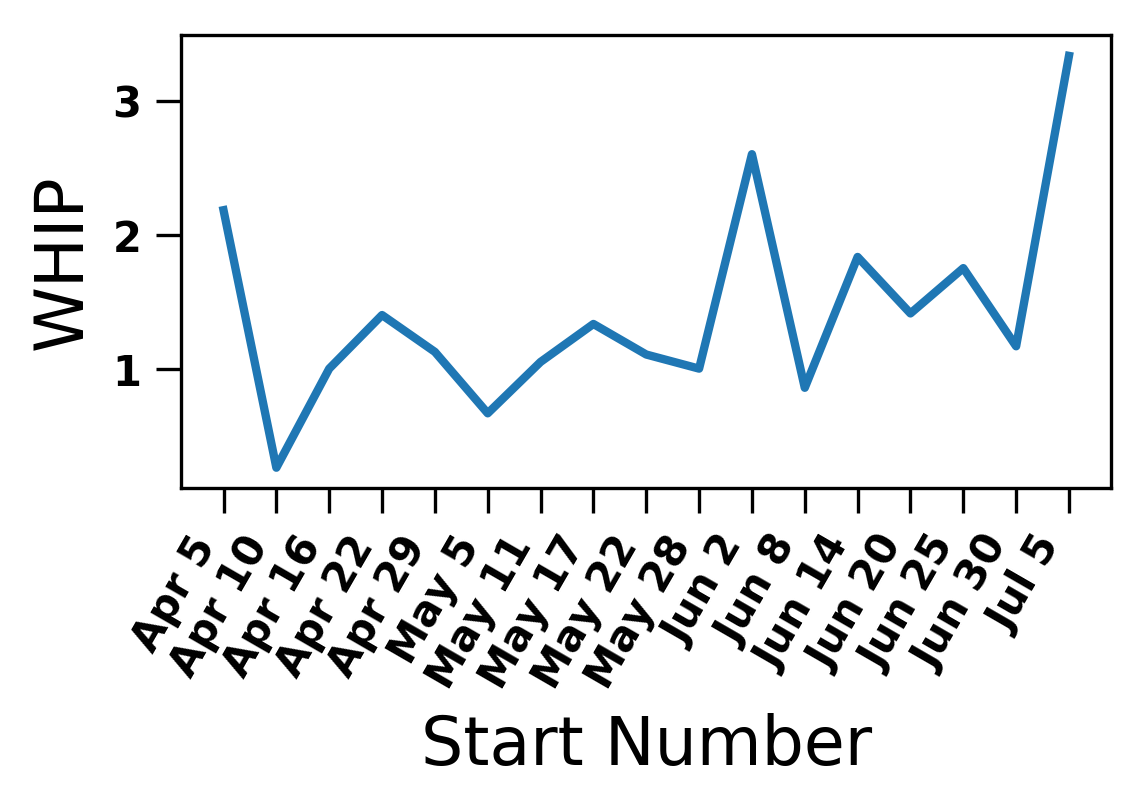

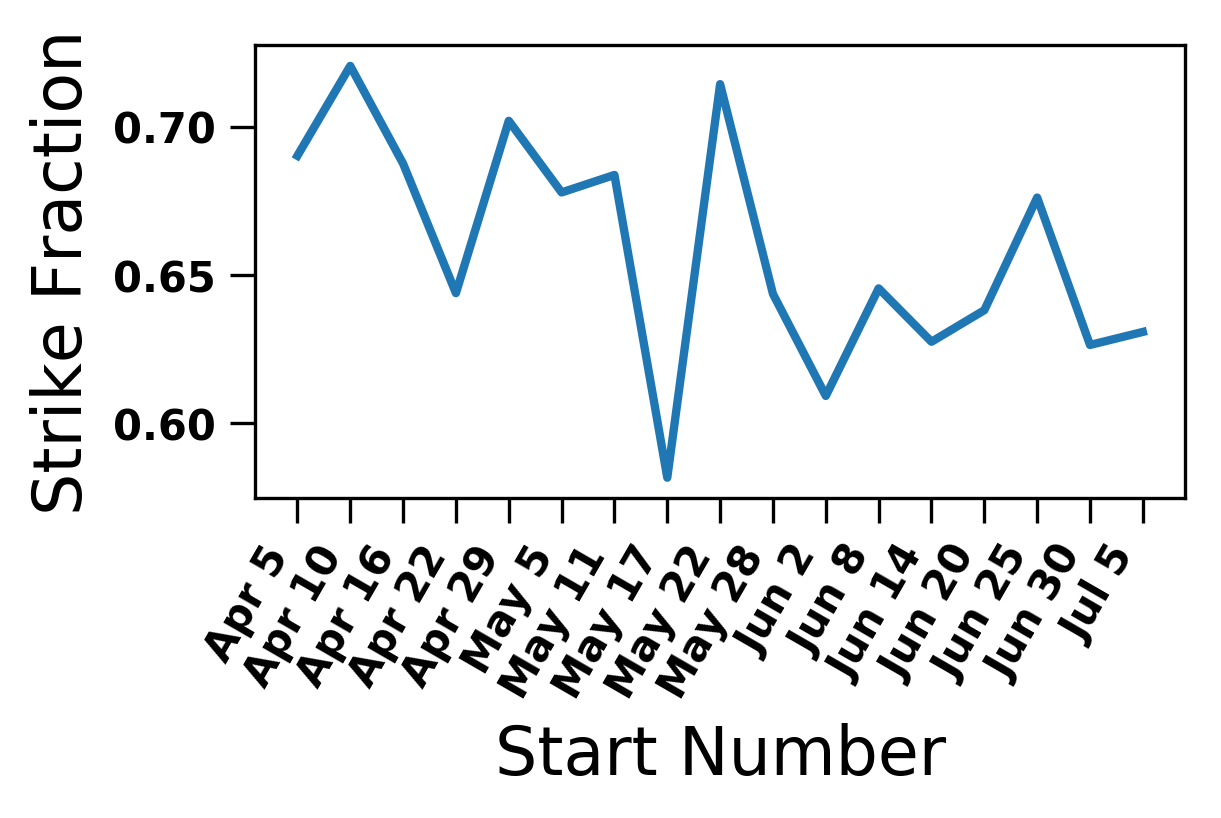

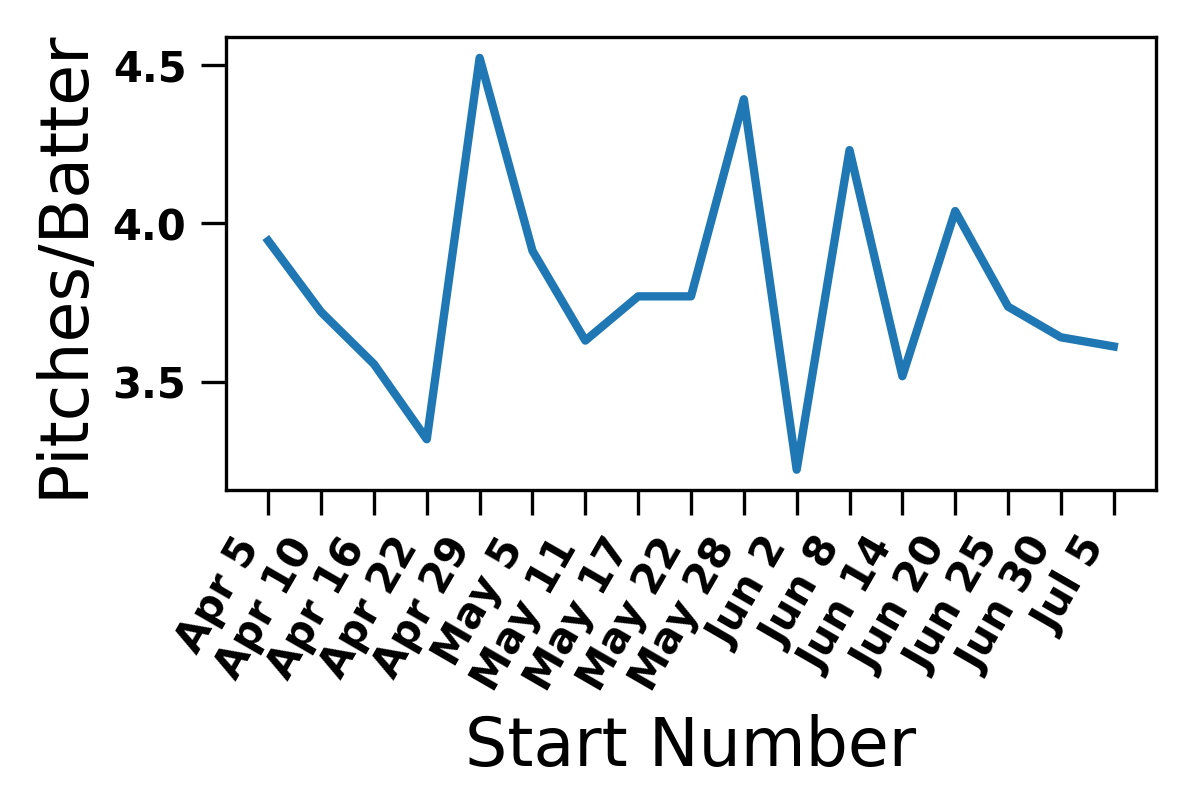

In [58]:

r_inns = np.floor(inns) + 3.33*(np.array(inns)-np.floor(inns))

fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),np.array(whip)/(np.array(r_inns)))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('WHIP',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')

    
    

fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),np.array(strikes)/(np.array(strikes)+np.array(balls)))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('Strike Fraction',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')


fig,ax = plt.subplots(figsize=(4,2))

ax.plot(np.arange(1,np.array(whip).size+1,1),(np.array(strikes)+np.array(balls))/np.array(tbf))
ax.set_xlabel('Start Number',size=16)
ax.set_ylabel('Pitches/Batter',size=16)
ax.set_xticks(np.arange(1,np.array(whip).size+1,1))

_ = ax.set_xticklabels(start_date, rotation=60, fontsize=10, ha='right')




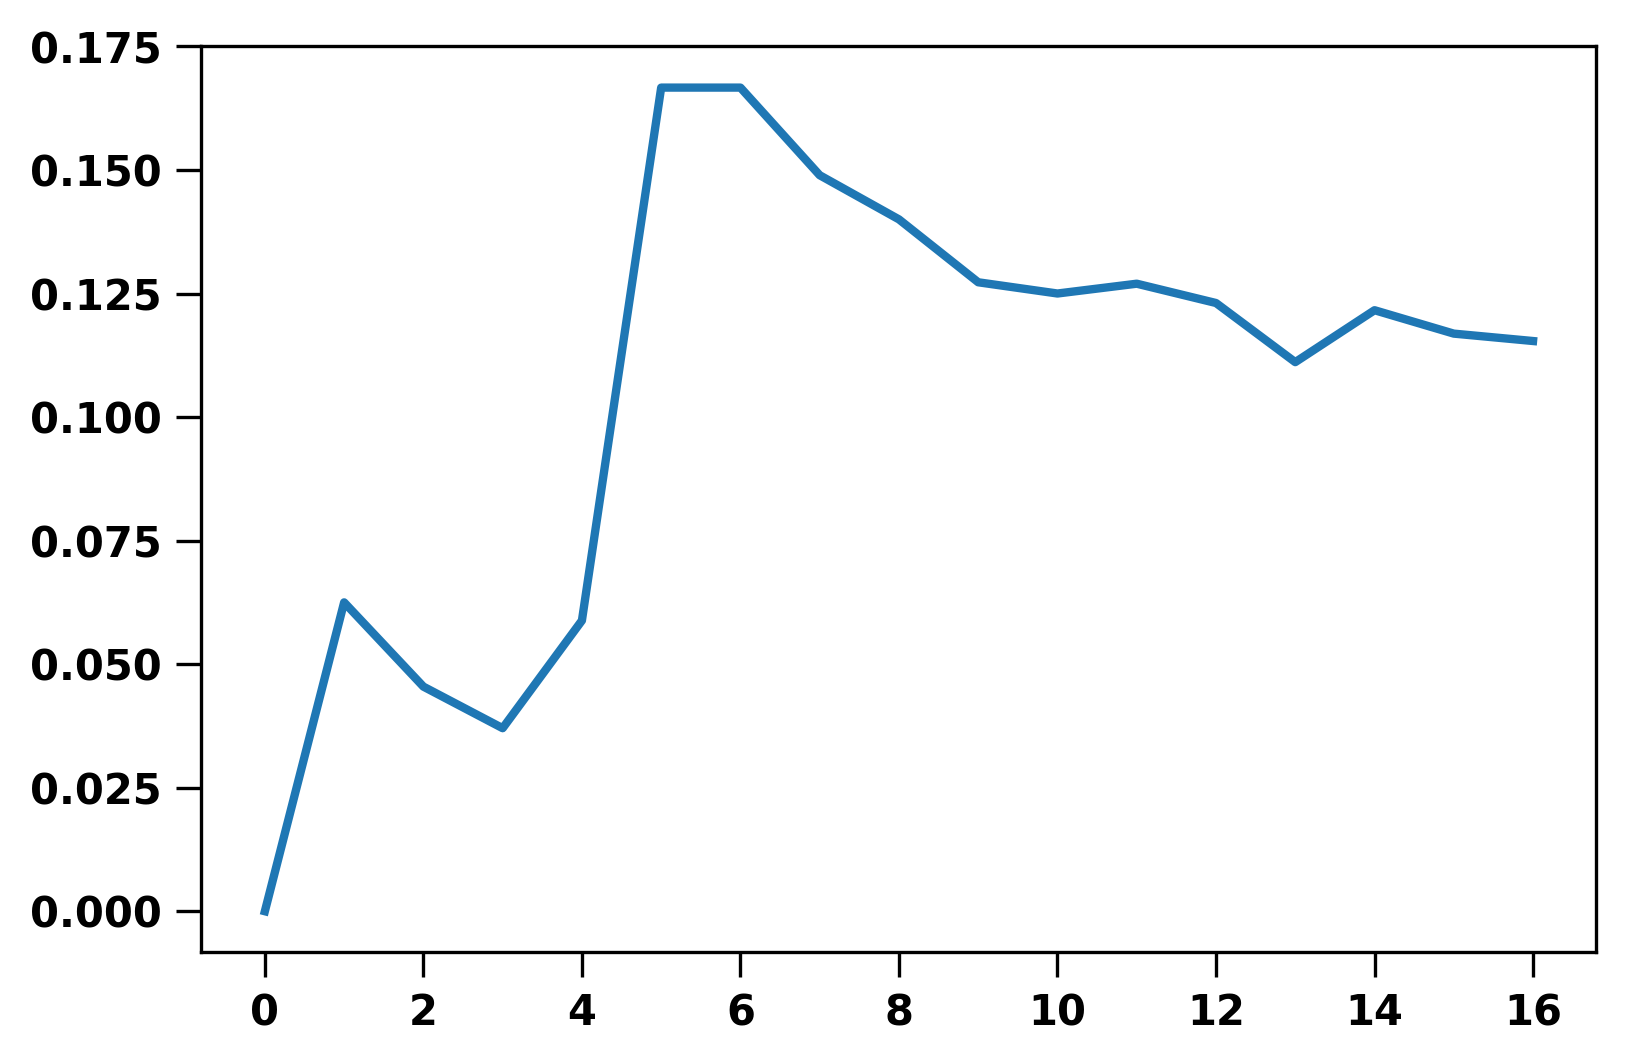

In [72]:
plt.plot(np.cumsum(k_look_log)/np.cumsum(k_swing_log))
#plt.plot(np.cumsum(k_swing_log))

In [70]:

import json
from pprint import pprint

tst_url = 'http://www.mlb.com/gdcross/components/game/mlb/year_2015/month_05/day_07/gid_2015_05_07_lanmlb_milmlb_1/game_events.json'

tst_url = 'http://www.mlb.com/gdcross/components/game/mlb/year_2017/month_06/day_30/gid_2017_06_30_nyamlb_houmlb_1/game_events.json'

r  = requests.get(tst_url)

data = json.loads(r.text)

#with r.text as data_file:    
#    data = json.load(r.text)

# number of pitches in this at-bat
print(len(data['data']['game']['inning'][0]['top']['atbat'][3]['pitch']))

print(data['data']['game']['inning'][0]['top']['atbat'][0]['pitcher'])



print(data['data']['game']['inning'][0]['top']['atbat'][3]['pitch'][0]['pitch_type'])




5
621121
CH


In [71]:
import xml